# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Assignment: One-step Temporal Difference or TD(0)

## Learning Objectives

At the end of the experiment, you will be able to:

* implement the one-step Temporal Difference learning algorithm - TD(0)
* understand optimality of TD(0)

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2302794" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9008710123" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "AIAS_B2_M4_AST_04_Optimality_of_TD_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://files.grouplens.org/datasets/movielens/ml-25m.zip")
    ipython.magic("sx unzip ml-25m.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aias-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Introduction

### **Temporal Difference Learning**

Temporal-difference (TD) learning is a combination of Monte Carlo ideas and dynamic programming (DP) ideas.

- Like Monte Carlo methods, TD methods can learn directly from raw experience without a model of the environment's dynamics.
- Like Dynamic programming methods, TD methods update estimates based in part on other learned estimates, without waiting for a final outcome.


### **TD(0) Prediction**

TD methods only wait until the next time step to update the value estimates. The most basic method for TD learning is the ***one-step TD*** or **TD(0)** method. Temporal-Difference TD(0) learning updates the estimated value of a state $V$ for policy based on the reward the agent received and the value of the state it transitioned to.

Specifically, if the agent is in a current state $S_t$ and takes the action $A_t$, it transitions to next state $S_{t+1}$ and receives the reward $R_{t+1}$, then we update our estimate of $V$ as following:

$$V(S_t) ← V(S_t) + \alpha \big[R_{t+1} + \gamma V(S_{t+1}) -  V(S_t)\big]$$

where,

- $V(S_t)$ = estimate at time $t$
- $R_{t+1}$ = reward at time $t+1$
- $\alpha$ = learning rate

    $α$ is a constant step-size parameter that impacts how quickly the Temporal Difference algorithm learns. We generally require $α$ to be suitably small to guarantee convergence, however the smaller the value of alpha the smaller the changes made for each update, and therefore the slower the convergence.

- $\gamma$ = discount factor

At time $t+1$ it immediately forms a target($R_{t+1} + \gamma V(S_{t+1})$) and make an update using the observed reward $R_{t+1}$ and the current estimate $V(S_{t+1})$.

A simple diagram of estimate update can be seen below.


<img src="https://www.lancaster.ac.uk/stor-i-student-sites/jordan-j-hood/wp-content/uploads/sites/28/2021/05/TD_zero.png" width=750px>

### **TD Error**

The value of $[R_{t+1} + γV(S_{t+1}) – V(S_t)]$ is commonly called the **TD Error**.

$$TD\ error, \delta_t = R_{t+1} + \gamma V(S_{t+1}) -  V(S_t) $$

TD error arises in various forms through-out Reinforcement Learning.

Here, the TD error is the difference between the current estimate for $V_t$, the discounted value estimate of $V_{t+1}$ and the actual reward gained from transitioning between $S_t$ and $S_{t+1}$. Hence correcting the error in $V_t$ slowly over many passes through.

The box below specifies TD(0) completely in procedural form.

<img src="https://cdn.iisc.talentsprint.com/AIAS/TD_0_Algorithm.png" width=700px>

Let's see the implementation of the one-step TD method for estimating value function for a simple grid-world example.

### Import required packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Example:

Consider a simple grid-orld example environment where the task is to teach an agent, to reach at state $f$.

<br>
<center>
<img src="https://cdn.iisc.talentsprint.com/AIAS/simple_env.png" width=350px>
</center>
<br>

The game starts with the player at any location of the 2x3 grid with the goal located at [0, 2]. If the player reaches the goal, it will receive a reward of $100$, and everywhere else the reward is $0$.

<br>

### Visualize Environment

Let's create a function to visualize the environment along with the initial Value functions estimates.

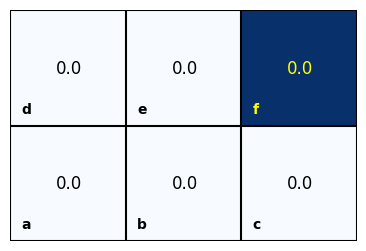

In [5]:
# Function to plot the environment along with Value estimates

def plot_env(ar=np.zeros((2,3))):
    arr = np.array([[0, 0, 1], [0, 0, 0]])
    plt.figure(figsize=(5,3))
    plt.imshow(arr, cmap='Blues')
    plt.plot([-0.5, 2.5], [0.5, 0.5], 'k')
    plt.plot([0.5, 0.5], [1.5, -0.5], 'k')
    plt.plot([1.5, 1.5], [1.5, -0.5], 'k')
    plt.plot([-0.5, 2.5, 2.5, -0.5, -0.5], [1.5, 1.5, -0.5, -0.5, 1.5], 'k')
    plt.text(-0.1, 0.05, ar[0][0], fontsize=12)
    plt.text(0.9, 0.05, ar[0][1], fontsize=12)
    plt.text(1.9, 0.05, ar[0][2], fontsize=12, color='yellow')
    plt.text(-0.1, 1.05, ar[1][0], fontsize=12)
    plt.text(0.9, 1.05, ar[1][1], fontsize=12)
    plt.text(1.9, 1.05, ar[1][2], fontsize=12)
    plt.text(-0.4, 1.4, 'a', fontsize=10, color='black', weight='bold')
    plt.text(0.6, 1.4, 'b', fontsize=10, color='black', weight='bold')
    plt.text(1.6, 1.4, 'c', fontsize=10, color='black', weight='bold')
    plt.text(1.6, 0.4, 'f', fontsize=10, color='yellow', weight='bold')
    plt.text(0.6, 0.4, 'e', fontsize=10, color='black', weight='bold')
    plt.text(-0.4, 0.4, 'd', fontsize=10, color='black', weight='bold')
    plt.axis( 'off' )
    plt.show()

plot_env()

Create a function to observe a single time step i.e. given at a current state, agent takes an action using random-policy, and moves to next state.

In [6]:
# Function to observe a single time step

def step():
    curr_state = np.random.choice(['a', 'b', 'c', 'd', 'e'])
    actions = {'a': ['b', 'd'],
                'b': ['a', 'e', 'c'],
                'c': ['b', 'f'],
                'd': ['a', 'e'],
                'e': ['d', 'b', 'f']}
    next_state = np.random.choice(actions[curr_state])
    print(f"{curr_state} -> {next_state}")
    return curr_state, next_state

st, st_ = step()

b -> a


Create another function to update the value estimates using TD(0) for the observed time step.

In [7]:
# Function to update the value function estimate for a single time step

def update_value_estimate(v, curr_st, next_st, alpha = 0.9, gamma = 1):
    V = {'a': v[1,0], 'b': v[1,1], 'c': v[1,2], 'd': v[0,0], 'e': v[0,1], 'f': v[0,2]}

    if next_st=='f':
        reward = 100
    else:
        reward = 0

    V[curr_st] = V[curr_st] + alpha * (reward + gamma*V[next_st] - V[curr_st])          # V(S) = V(S) + α×[R + γ×V(S') − V(S)]

    result = np.array([[V['d'], V['e'], V['f']],
                       [V['a'], V['b'], V['c']]]).round(1)
    return result


### TD(0) Prediction

In [8]:
# Initial Value function estimates
# It's first initialized to 0, and then values will be updated using TD(0)

v = np.array([[0, 0, 0],
              [0, 0, 0]])

c -> f


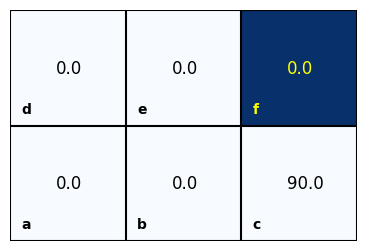

In [9]:
# Update estimates for a single time step
# Update estimates from moving from state 'c' to state 'f'

print("c -> f")
plot_env(update_value_estimate(v, 'c', 'f', alpha = 0.9, gamma = 0.9))

e -> b


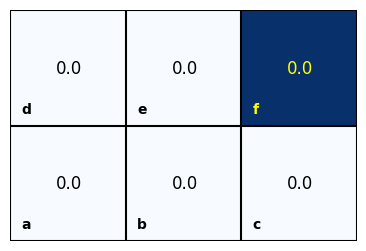

In [10]:
# Update estimates for a single time step

curr_st, next_st = step()
v = update_value_estimate(v, curr_st, next_st, alpha = 0.9, gamma = 0.9)
plot_env(v)

You can run the above cell multiple times to see the value function estimates updating.

OR

Run the below cell to see the updates after 200 time steps.

e -> b
a -> b
e -> b
c -> f
d -> e
b -> e
e -> f
c -> b
c -> b
c -> b
d -> a
e -> d
b -> c
e -> d
e -> b
b -> e
d -> e
b -> a
e -> b
a -> d
e -> b
a -> b
d -> a
c -> f
d -> a
c -> b
b -> e
c -> b
c -> b
e -> d
a -> b
e -> b
b -> c
a -> d
e -> f
b -> e
c -> f
b -> e
b -> e
a -> d
e -> f
a -> d
d -> a
c -> f
c -> f
b -> c
e -> d
d -> e
e -> f
c -> b
b -> c
d -> a
d -> a
c -> b
a -> d
e -> b
e -> b
d -> e
d -> a
a -> d
e -> f
c -> b
b -> c
b -> a
e -> f
a -> b
d -> e
e -> d
c -> b
b -> c
a -> d
b -> e
d -> e
a -> d
b -> e
b -> e
b -> e
e -> f
c -> b
d -> a
d -> a
a -> b
b -> c
b -> c
e -> d
d -> a
b -> a
c -> f
a -> b
d -> e
a -> d
a -> d
e -> b
a -> d
a -> b
c -> f
b -> c
e -> d
e -> b
d -> a
c -> b
a -> b
c -> b
c -> f
e -> f
d -> e
a -> b
e -> d
a -> d
d -> a
c -> f
e -> d
d -> e
e -> f
a -> d
e -> d
c -> b
a -> b
b -> e
d -> e
b -> a
c -> b
c -> f
a -> b
c -> b
c -> b
e -> d
c -> b
d -> e
b -> e
d -> e
a -> b
c -> f
a -> d
b -> e
b -> c
b -> a
d -> e
b -> a
c -> f
e -> f
e -> d
d -> e

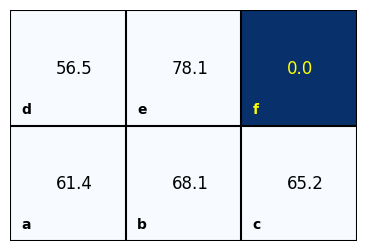

In [11]:
# Update estimates for 200 timesteps

v = np.array([[0, 0, 0],
              [0, 0, 0]])

for i in range(200):
    curr_st, next_st = step()
    v = update_value_estimate(v, curr_st, next_st, alpha=0.9, gamma=0.9)

plot_env(v)

In [12]:
v

array([[56.5, 78.1,  0. ],
       [61.4, 68.1, 65.2]])

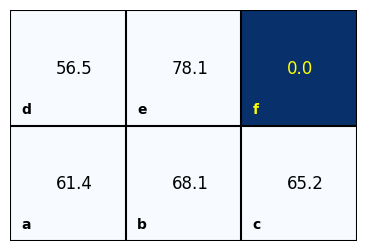

In [13]:
plot_env(v)

### **Optimality of TD(0)**

Suppose there is available only a finite amount of experience, say 10 episodes. In this case, a common approach with incremental learning methods is to present the experience repeatedly until the method converges upon an answer. This is called Batch updating.

In **Batch Updating**, we train completely on a finite amount of data, e.g., we train repeatedly on 5 episodes until convergence.

For any finite Markov prediction task, under batch updating, TD(0) converges deterministically to a single answer independent of the step-size parameter, α, as long as α is chosen to be sufficiently small.


In [14]:
# Number of episodes to consider
n_episodes = 5

experiences = []

# Possible actions for a given state
actions = {'a': ['b', 'd'],
           'b': ['a', 'e', 'c'],
           'c': ['b', 'f'],
           'd': ['a', 'e'],
           'e': ['d', 'b', 'f']}

# Explore the environment for n_episodes

for i in range(n_episodes):

    curr_state = np.random.choice(['a', 'b', 'c', 'd', 'e'])          # starting state
    episode_exp = [curr_state]           # save current starting state for the episode
    print(f"\nEpisode {i+1}: {curr_state}", end=' ')

    while True:               # to execute till the episode ends
        next_state = np.random.choice(actions[curr_state])          # take a random action and move to next state
        print(f"-> {next_state}", end=' ')
        episode_exp.append(next_state)             # save next_state for the episode

        if next_state == 'f':       # end episode if the goal is reached
            break

        curr_state = next_state           # update next state as current state

    experiences.append(episode_exp)       # save experience gained during the episode



Episode 1: d -> a -> b -> a -> b -> a -> d -> e -> d -> a -> d -> a -> d -> e -> d -> e -> b -> e -> d -> e -> f 
Episode 2: e -> b -> c -> b -> e -> d -> e -> b -> e -> b -> e -> d -> e -> b -> a -> b -> c -> b -> a -> b -> c -> b -> a -> b -> c -> f 
Episode 3: c -> b -> e -> b -> a -> d -> e -> f 
Episode 4: b -> a -> d -> a -> b -> a -> d -> a -> d -> a -> d -> a -> d -> e -> b -> e -> b -> e -> f 
Episode 5: a -> d -> e -> d -> a -> d -> e -> f 

In [15]:
# Check experience for each episode

for episode in experiences:
    print(episode)

['d', 'a', 'b', 'a', 'b', 'a', 'd', 'e', 'd', 'a', 'd', 'a', 'd', 'e', 'd', 'e', 'b', 'e', 'd', 'e', 'f']
['e', 'b', 'c', 'b', 'e', 'd', 'e', 'b', 'e', 'b', 'e', 'd', 'e', 'b', 'a', 'b', 'c', 'b', 'a', 'b', 'c', 'b', 'a', 'b', 'c', 'f']
['c', 'b', 'e', 'b', 'a', 'd', 'e', 'f']
['b', 'a', 'd', 'a', 'b', 'a', 'd', 'a', 'd', 'a', 'd', 'a', 'd', 'e', 'b', 'e', 'b', 'e', 'f']
['a', 'd', 'e', 'd', 'a', 'd', 'e', 'f']


Update value estimates based on experiences

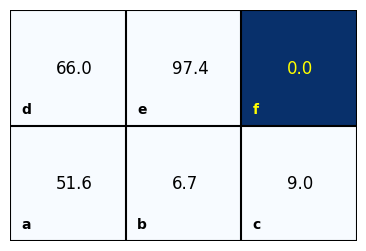

In [16]:
# Hyperparameters
alpha = 0.9
gamma = 0.9

# Initial value estimates
v = np.array([[0, 0, 0],
              [0, 0, 0]])


# Based on experiences update the value estimates repeatedly

repetition = 1

for _ in range(repetition):
    for episode in experiences:
        for i in range(len(episode)-1):
            curr_state = episode[i]
            nex_state = episode[i+1]
            v = update_value_estimate(v, curr_state, nex_state, alpha=alpha, gamma=gamma)


plot_env(v)

### Please answer the questions below to complete the experiment:


In [17]:
# @title In TD learning, what does the term bootstrapping refer to?  { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "Updating values using the temporal difference between the current and next state." #@param ["","Ignoring future rewards during the update process.", "Updating values using the temporal difference between the current and next state.","Updating values based on the sum of future rewards."]

In [18]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "good and challenging" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please complete the setup first.
